In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf
import healpy as hp
from scipy.stats import binned_statistic

In [2]:
class TimeScaleN(maf.metrics.BaseMetric):
    """how many observations spanning some timescale
    """
    def __init__(self, night_col='night', metric_name='TimeScaleN', 
                 gap=1, **kwargs):
        self.night_col=night_col
        self.gap = gap
        super(TimeScaleN, self).__init__(col=night_col, metric_name=metric_name, **kwargs)
    def run(self, dataSlice, slice_point=None):
        
        # night is handy. if we want to do some arbitrary timescale probably have to 
        # got and make the full difference array. 
        
        # Could loop through each filter if we want to demand same-filter
        unights = np.unique(dataSlice[self.night_col])
        nd = np.diff(unights)
        result = np.size(np.where(nd == self.gap)[0])
        return result

In [3]:
def full_range(in_arr):
    return np.max(in_arr) - np.min(in_arr)

class ShortScaleN(maf.metrics.BaseMetric):
    """How times we have observations in a night with x hour+gap"""
    def __init__(self, night_col='night', time_col='observationStartMJD',
                 metric_name='ShortScaleN', 
                 gap=2., **kwargs):
        self.night_col=night_col
        self.time_col = time_col
        self.gap = gap/24.  # to hours
        super(ShortScaleN, self).__init__(col=[night_col, time_col], metric_name=metric_name, **kwargs)
    def run(self, data_slice, slice_point=None):
        
        bins = np.arange(np.min(data_slice[self.night_col]), np.max(data_slice[self.night_col])+2, 1) - 0.5
        
        max_gaps, be, bi = binned_statistic(data_slice[self.night_col],
                                            data_slice[self.time_col],
                                            bins=bins, statistic=full_range)
        result = np.size(np.where(max_gaps >= self.gap)[0])
        
        return result

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


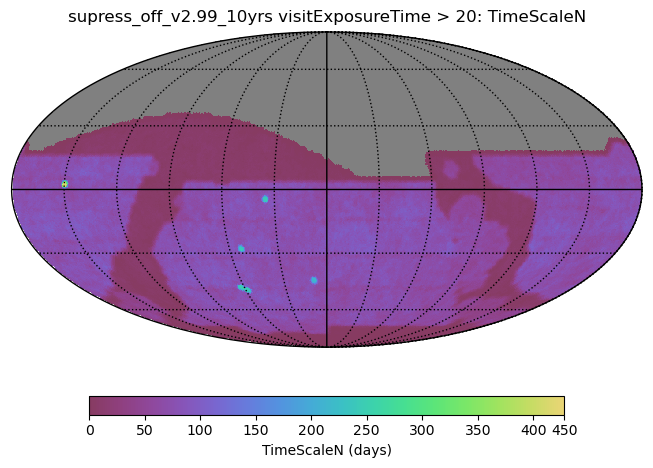

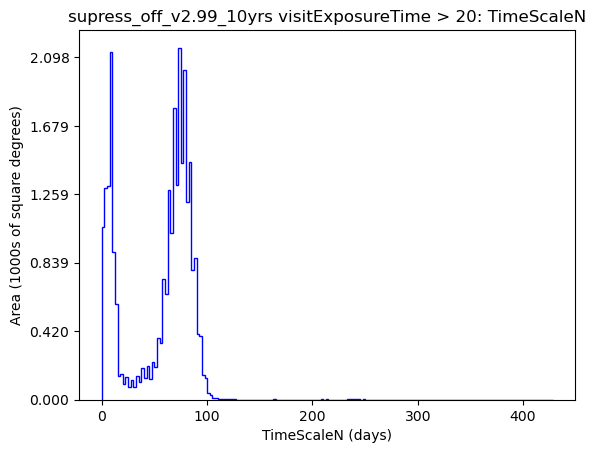

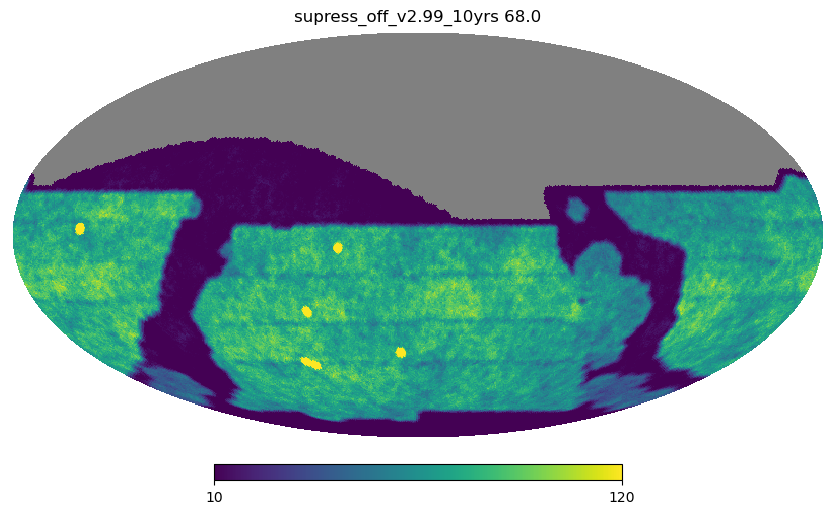

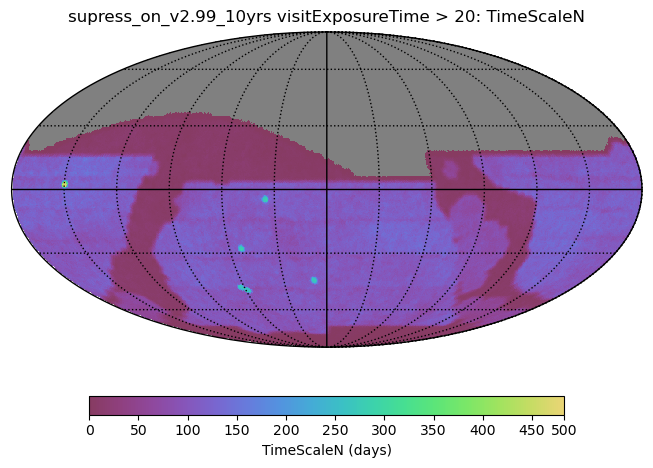

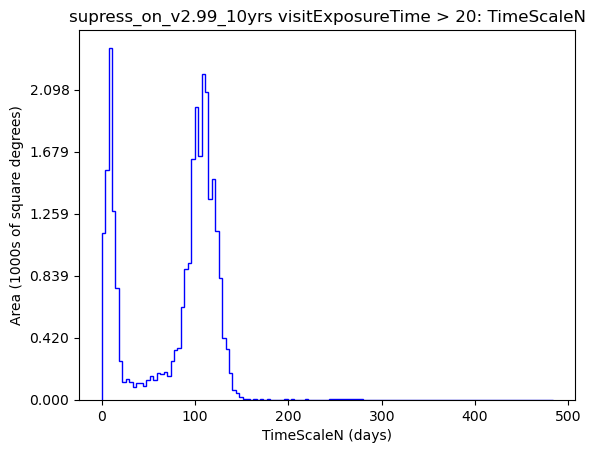

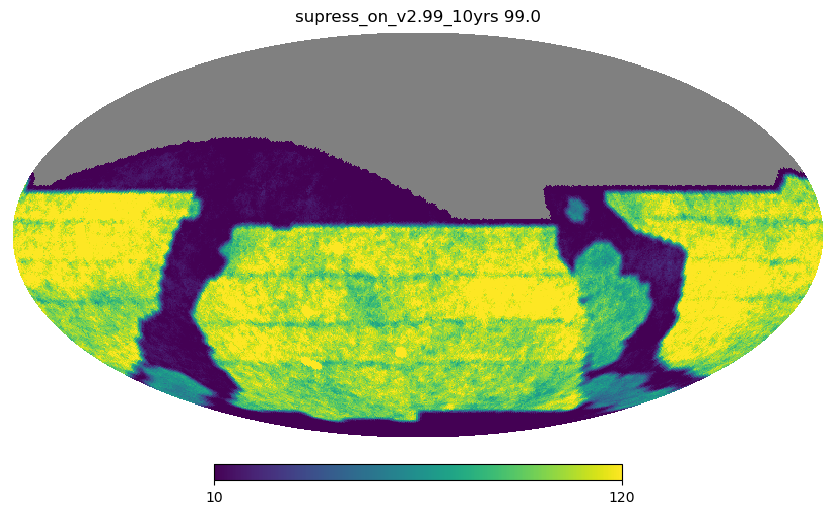

In [4]:
for filename in ['supress_off_v2.99_10yrs.db', 'supress_on_v2.99_10yrs.db']:
    run_name = filename.replace('.db', '')

    bundle_list = []
    sql = 'visitExposureTime > 20'
    metric = TimeScaleN()
    slicer = maf.HealpixSlicer()

    summary = [maf.MedianMetric()]
    bundle_list.append(maf.MetricBundle(metric, slicer, sql,
                                        summary_metrics=summary,
                                       run_name=run_name))

    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, filename, out_dir='temp')

    mbg.run_all()
    mbg.plot_all(closefigs=False)
    
    val = ' '
    for key in bundle_list[0].summary_values:
        val += str(bundle_list[0].summary_values[key])

    hp.mollview(bundle_list[0].metric_values, max=120, min=10, title=run_name + val)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 243 bins, returning 200
  warnings.warn(


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 286 bins, returning 200
  warnings.warn(


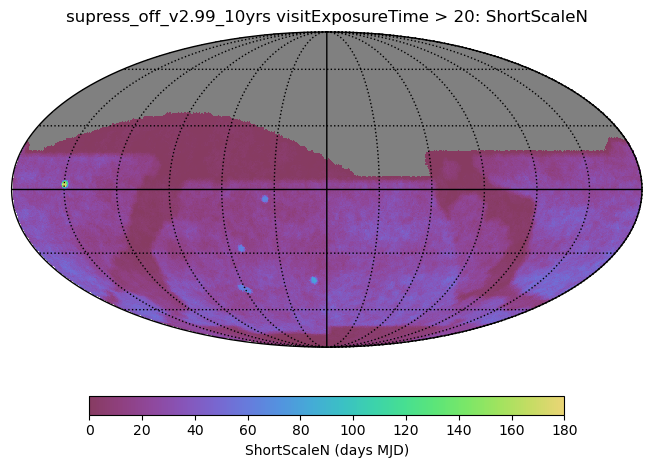

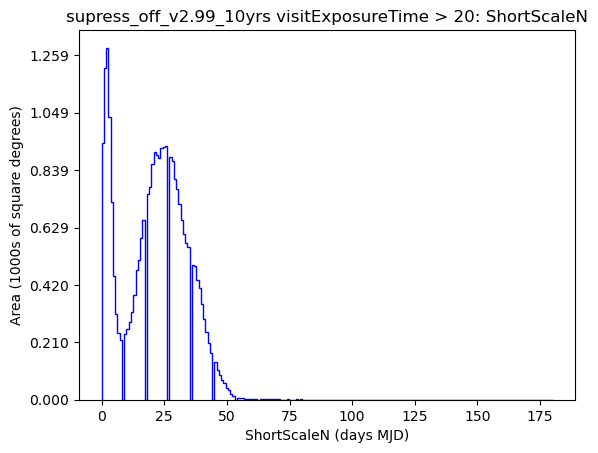

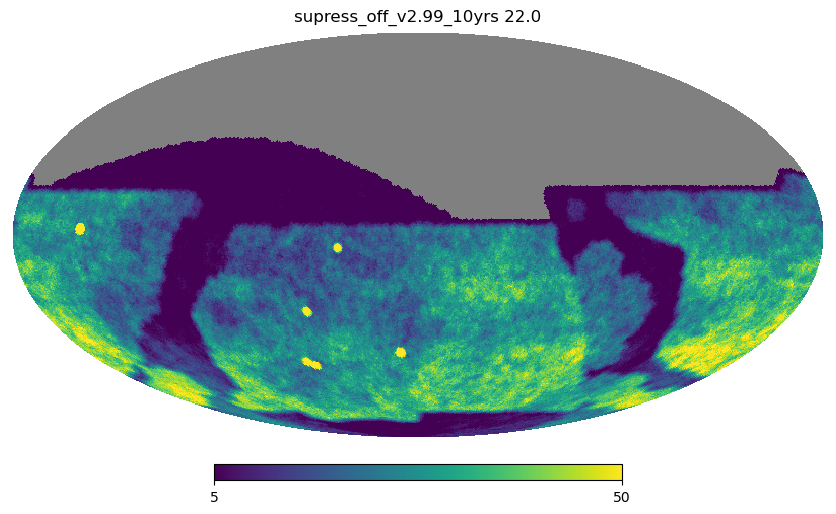

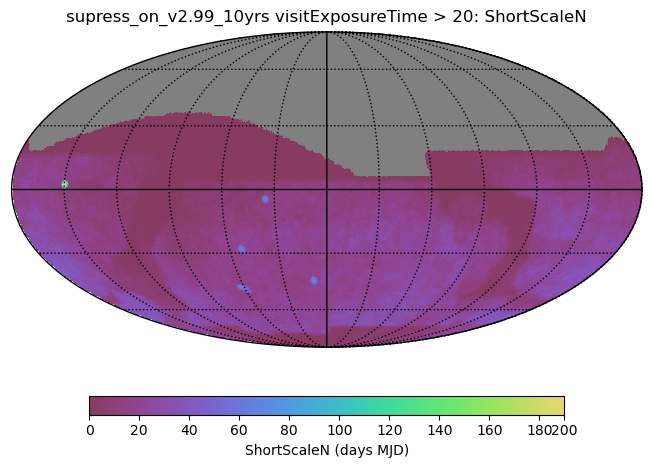

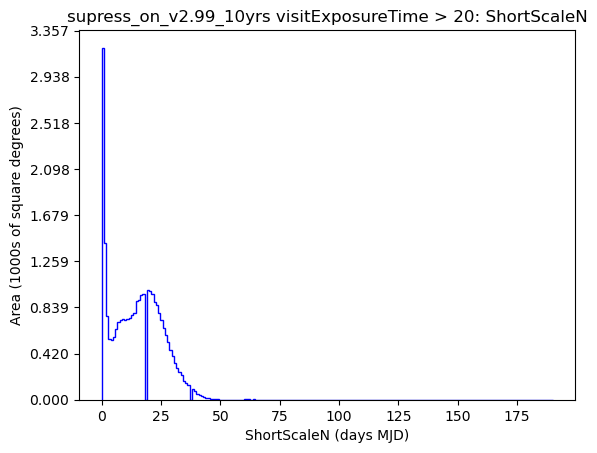

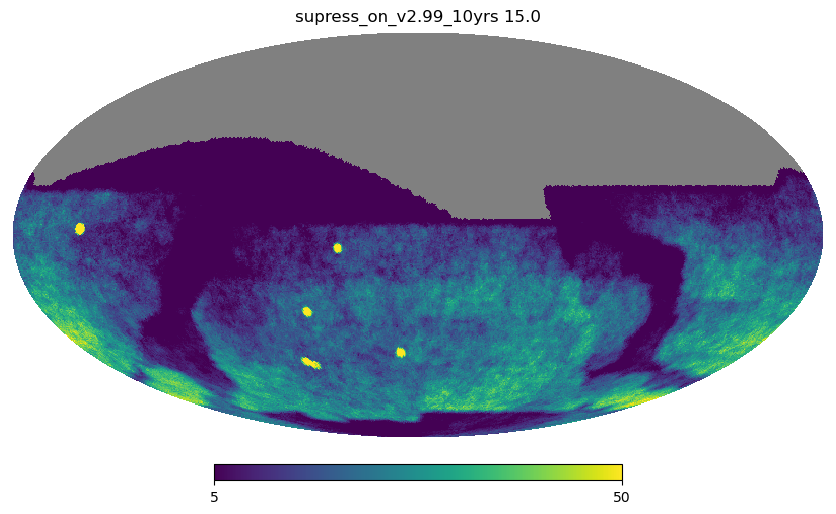

In [6]:
for filename in ['supress_off_v2.99_10yrs.db', 'supress_on_v2.99_10yrs.db']:
    run_name = filename.replace('.db', '')

    bundle_list = []
    sql = 'visitExposureTime > 20'
    metric = ShortScaleN()
    slicer = maf.HealpixSlicer()

    summary = [maf.MedianMetric()]
    bundle_list.append(maf.MetricBundle(metric, slicer, sql,
                                        summary_metrics=summary,
                                       run_name=run_name))

    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, filename, out_dir='temp')

    mbg.run_all()
    mbg.plot_all(closefigs=False)
    
    val = ' '
    for key in bundle_list[0].summary_values:
        val += str(bundle_list[0].summary_values[key])

    hp.mollview(bundle_list[0].metric_values, max=50, min=5, title=run_name + val)